In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
data = pd.read_csv("/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/data/GBPUSD=X daily.csv")

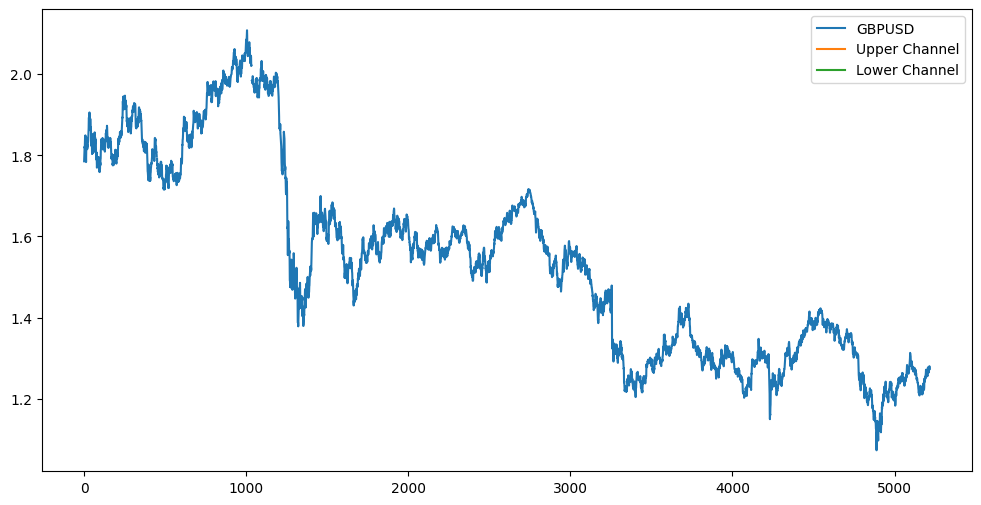

In [47]:
from scipy.stats import linregress

def detect_channel(data, window_size=40):
    """
    Detects a descending channel in the given price data.

    Args:
        data: Pandas DataFrame with columns 'Date', 'High', 'Low'.
        window_size: Size of the window for channel calculation.

    Returns:
        upper_channel: Series representing the upper channel line.
        lower_channel: Series representing the lower channel line.
    """
    upper_ma = data['High'].rolling(window_size).mean()
    lower_ma = data['Low'].rolling(window_size).mean()

    slope_upper, _, _, _, _ = linregress(np.arange(len(upper_ma)), upper_ma)
    slope_lower, _, _, _, _ = linregress(np.arange(len(lower_ma)), lower_ma)

    upper_channel = upper_ma + slope_upper * np.arange(len(data))
    lower_channel = lower_ma + slope_lower * np.arange(len(data))

    return upper_channel, lower_channel

# Load GBPUSD data (replace with your data source)
#data = pd.read_csv("gbpusd_data.csv", index_col='Date', parse_dates=True)

# Detect the channel
upper_channel, lower_channel = detect_channel(data)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='GBPUSD')
plt.plot(upper_channel, label='Upper Channel')
plt.plot(lower_channel, label='Lower Channel')
plt.fill_between(data.index, upper_channel, lower_channel, alpha=0.1)
plt.legend()
plt.show()